In [1]:
# Based on coursera's neurohacking in R
# Reference : https://www.alexejgossmann.com/MRI_viz/
install.packages('fslr')

library(fslr)

also installing the dependencies 'bitops', 'abind', 'RNifti', 'matrixStats', 'R.oo', 'R.methodsS3', 'oro.nifti', 'neurobase', 'R.utils'




  There is a binary version available but the source version is later:
       binary source needs_compilation
RNifti  1.3.0  1.3.1              TRUE

  Binaries will be installed
package 'bitops' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'RNifti' successfully unpacked and MD5 sums checked
package 'matrixStats' successfully unpacked and MD5 sums checked
package 'R.oo' successfully unpacked and MD5 sums checked
package 'R.methodsS3' successfully unpacked and MD5 sums checked
package 'oro.nifti' successfully unpacked and MD5 sums checked
package 'neurobase' successfully unpacked and MD5 sums checked
package 'R.utils' successfully unpacked and MD5 sums checked
package 'fslr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kimji\AppData\Local\Temp\RtmpABugy3\downloaded_packages


Warning message:
"package 'fslr' was built under R version 3.6.3"Loading required package: oro.nifti
Warning message:
"package 'oro.nifti' was built under R version 3.6.3"oro.nifti 0.11.0
Loading required package: neurobase
Warning message:
"package 'neurobase' was built under R version 3.6.3"

Example MRI data

In [2]:
nii_T1 = readNIfTI("../data/exampleT1.nii", reorient=FALSE)
dim(nii_T1)

[1] 256 256 176

Display an orthographic projection with orthographic

[1] 256 256 176

[1] "nifti"
attr(,"package")
[1] "oro.nifti"

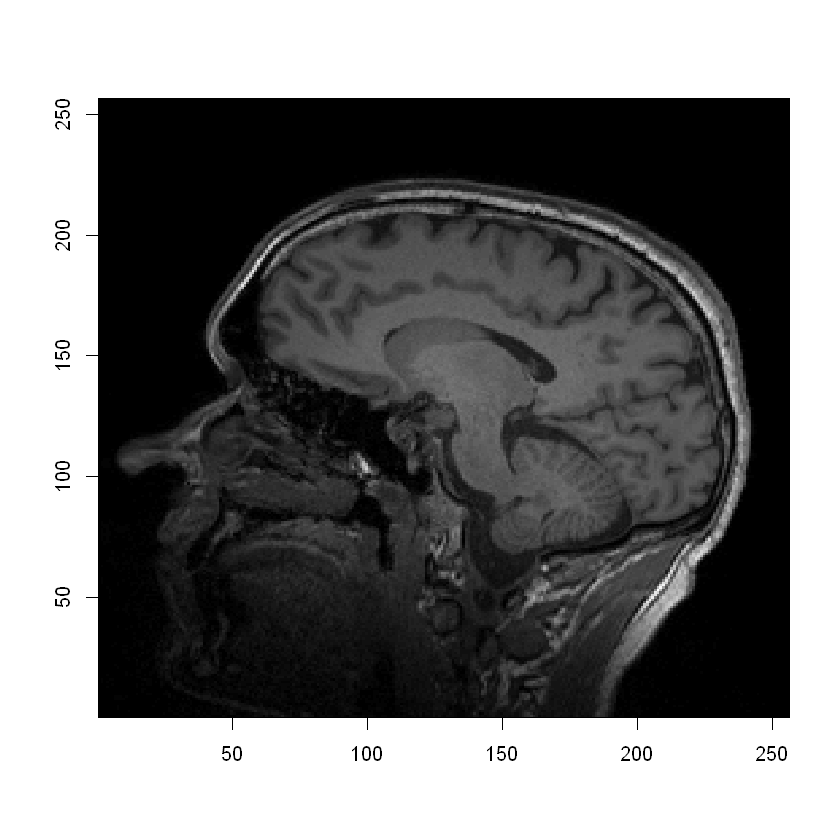

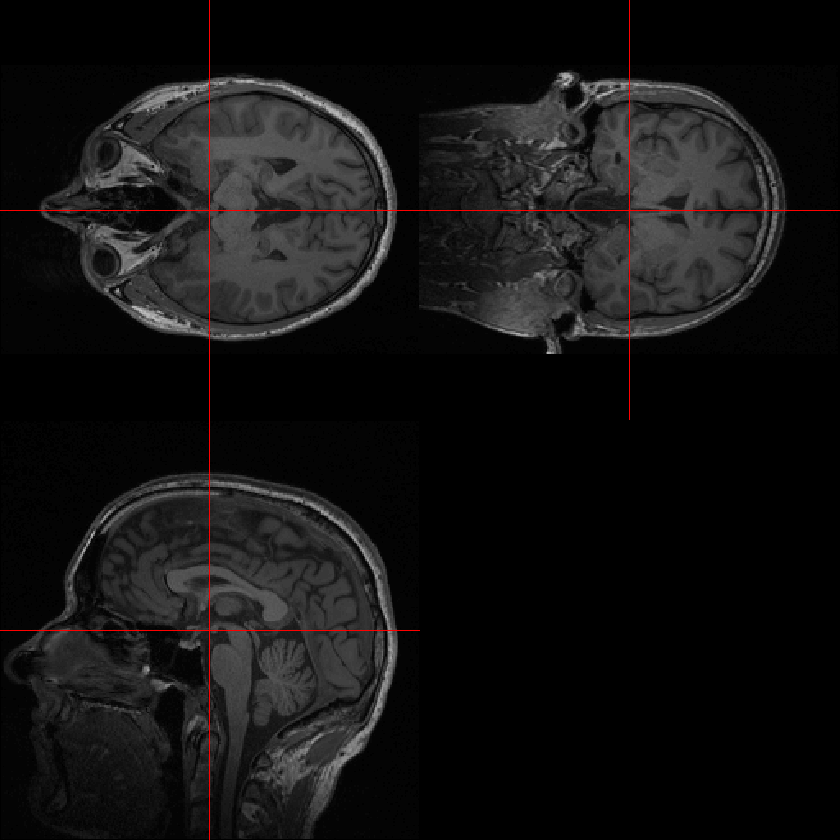

In [7]:
d = dim(nii_T1); d; class(nii_T1)
image(1:d[1],1:d[2],nii_T1[,,100],col=gray(0:64/64),xlab="",ylab="")

orthographic(nii_T1)

Visulaie brain slices with image

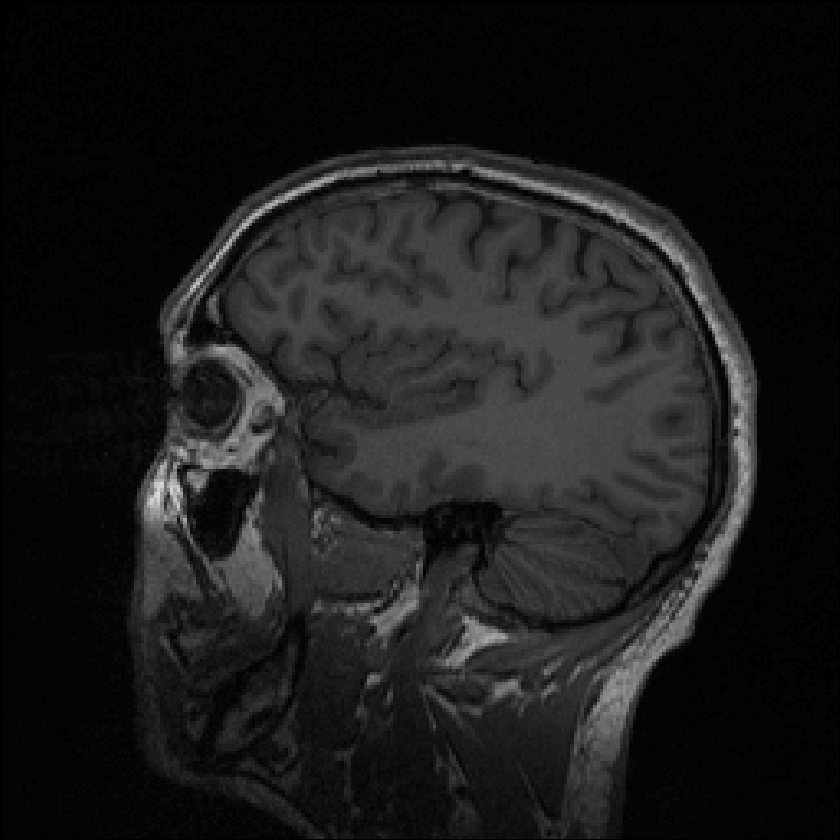

In [14]:
image(nii_T1, z = 50, plot.type = "single")

In [ ]:
image(nii_T1)

Skull stripping (prerequisite : FSL software and the fslr R packages)

In [ ]:
# skull stripping using FSL's Brain Extraction Tool (BET)
library(fslr)
img_bet <- fslbet(infile = nii_T1, retimg = TRUE)

# plotting extracted brain as a mask on top of original data
mask <- nii_T1
in_mask <- img_bet > 0
mask[in_mask] <- 1
mask[!in_mask] <- NA
orthographic(x = nii_T1, y = mask, col.y = "lightblue")

Polish orthographic displays with ortho2

In [ ]:
library(scales)
ortho2(nii_T1, mask, col.y = alpha("red", 0.3))

Show two orthographic display side by side with double_ortho

In [ ]:
brain <- nii_T1
brain[!in_mask] <- NA
double_ortho(nii_T1, brain)

There are more and more libraries for dealing with fMRI data, or simulating fMRI data, but I typically use the fmri library to read in NIfTI data. The only snag is the nifti file needs to be unzipped first.

In [ ]:
library(fmri)
# First load in the structure
# This file is already unzipped
dat.struct = read.NIFTI("~/Dropbox/NeuroHackWeek/bold.nii")
dat = extract.data(dat.struct)
dim(dat)

[R for statistical analysis of fMRI data](https://neurohackademy.org/course/r-for-statistical-analysis-of-fmri-data/) <br>
[neuropointillist](http://ibic.github.io/neuropointillist/) <br>
[Flexible modeling of neuroimaging data in R, point by point](https://github.com/IBIC/neuropointillist)

<h2>Reference</h2>

[Extra bits we probably won't have time to cover](https://jeanettemumford.org/R-tutorial/10-extras-dplyr-tidyr-fmri/)